In [1]:
%load_ext autoreload
%autoreload 2
import os; import sys; sys.path.insert(0, '../')
import pandas as pd
import tqdm
import pickle

import vis
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [2]:
### Configure file and folder names
data_feather = "../data/soccermix_J1_all_data.feather"

models = "../data/soccermix_J1_models.pkl"
c_weights = "../data/soccermix_J1_all_catweights.pkl"
l_weights = "../data/soccermix_J1_all_locweights.pkl"
d_weights = "../data/soccermix_J1_all_dirweights.pkl"

In [3]:
def loadall(filename):
    with open(filename, "rb") as f:
        while True:
            try:
                yield pickle.load(f)
            except EOFError:
                break

items = loadall(models)
d_w = loadall(d_weights)

In [4]:
cat_model = next(items)
loc_models = next(items)
dir_models = next(items)
dir_weights = next(d_w)

In [ ]:
X = pd.read_feather(data_feather)
games = pd.read_feather('../data/JL_games.feather')
teams = pd.read_feather('../data/JL_teams.feather')
players = pd.read_feather('../data/JL_players.feather')
pg = pd.read_feather('../data/JL_player_games.feather')
mp = pg[["player_id", "minutes_played"]].groupby("player_id").sum().reset_index()

japan_id_map = dict(zip(games["home_team_name"], games["home_team_id"]))
merged_weights = dir_weights.copy()
merged_weights["team_id"] = X.team_id.values
merged_weights["game_id"] = X.game_id.values
merged_weights["player_id"] = X.player_id.values


In [7]:
merged_weights = dir_weights.copy()
merged_weights["team_id"] = X.team_id.values
merged_weights["game_id"] = X.game_id.values

In [8]:
vectors = {}

for p in tqdm.tqdm(list(games.home_team_id.unique())):
    vec = merged_weights.loc[merged_weights.team_id == p, dir_weights.columns].sum().values
    vectors[int(p)] = vec

100%|██████████| 20/20 [00:01<00:00, 12.67it/s]


In [9]:
vectors_pd = pd.concat({k: pd.DataFrame(v).T for k,v in vectors.items()}).droplevel(level=1)
vectors_pd.index.name = "team_id"
vectors_pd.columns = dir_weights.columns

### Compare teams: Vissel Kobe - Sanfrecce Hiroshima

In [13]:
print(teams[teams.team_name == 'Vissel Kobe'].team_id)
print(teams[teams.team_name == 'Sanfrecce Hiroshima'].team_id)

8    1886
Name: team_id, dtype: int64
11    1889
Name: team_id, dtype: int64


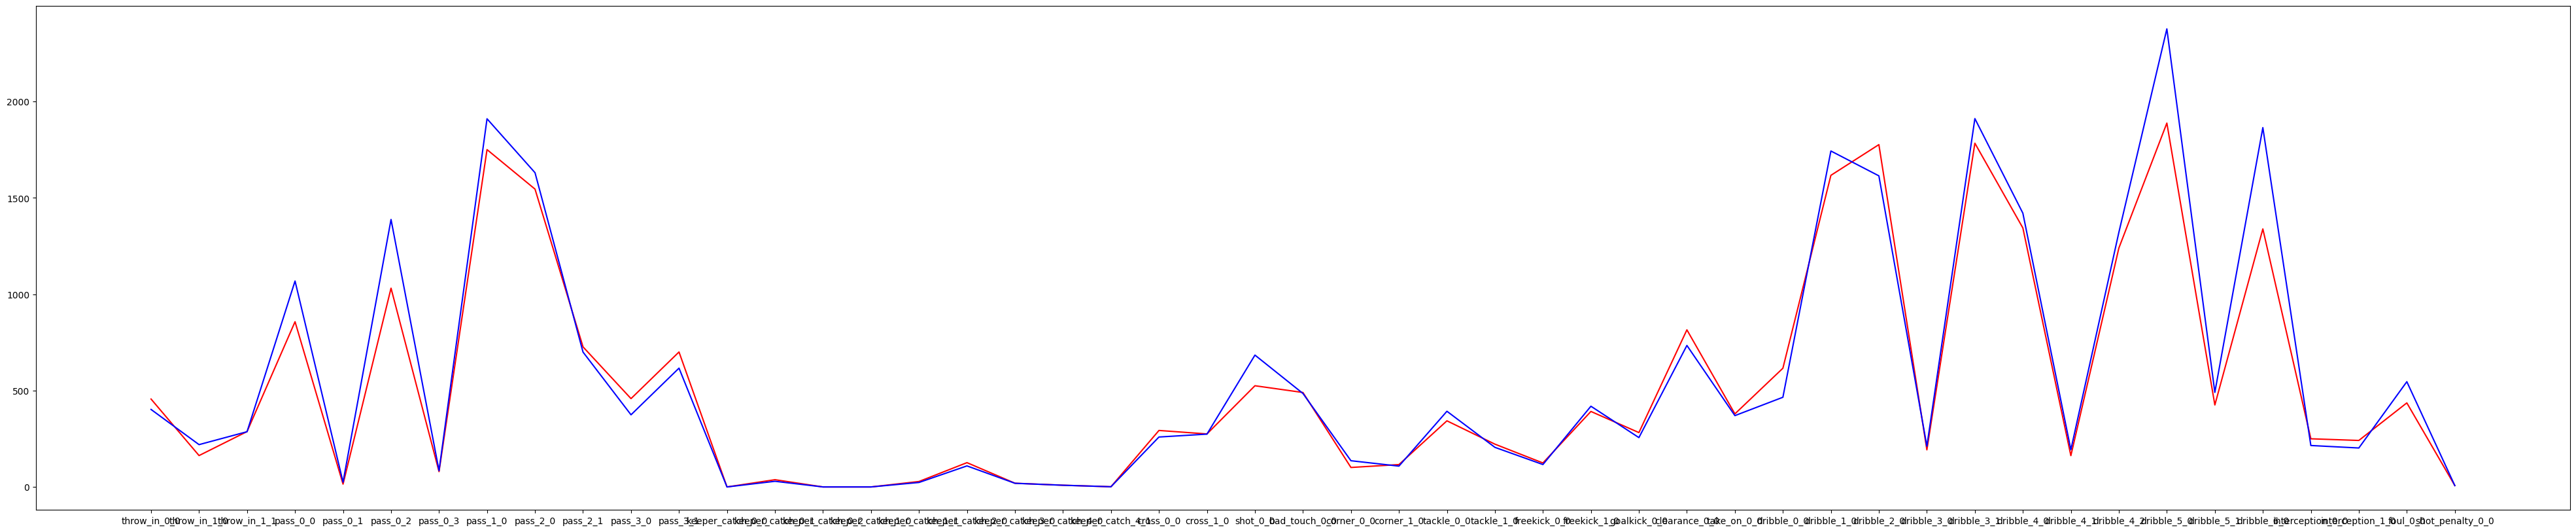

In [14]:
plt.figure(figsize=(50,10))
plt.plot(vectors_pd.columns.values, vectors_pd.loc[1886,:], 'r') # Vissel Kobe
plt.plot(vectors_pd.columns.values, vectors_pd.loc[1889,:], 'b') # Sanfrecce Hiroshima

throw_in 2
throw_in_0 1
throw_in_1 2


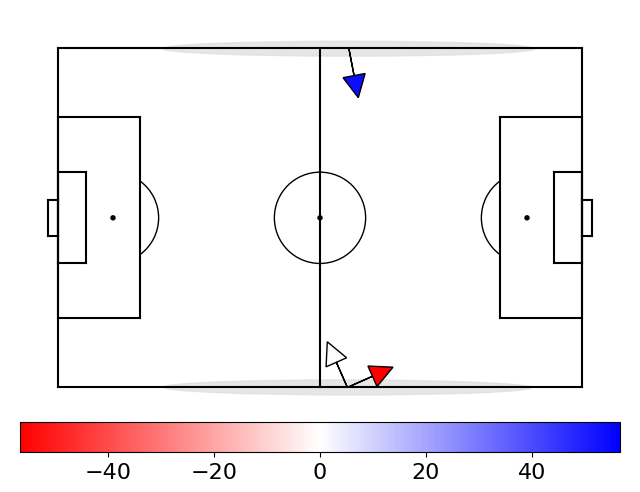

pass 7
pass_0 4
pass_1 1
pass_2 2
pass_3 2


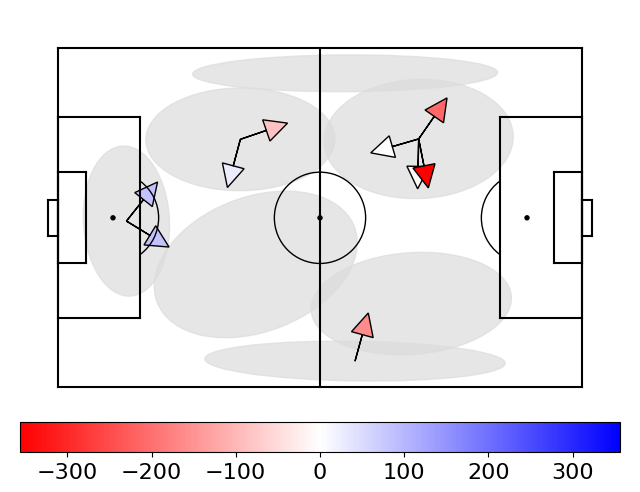

keeper_catch 6
keeper_catch_0 3
keeper_catch_1 2
keeper_catch_2 1
keeper_catch_3 1
keeper_catch_4 2


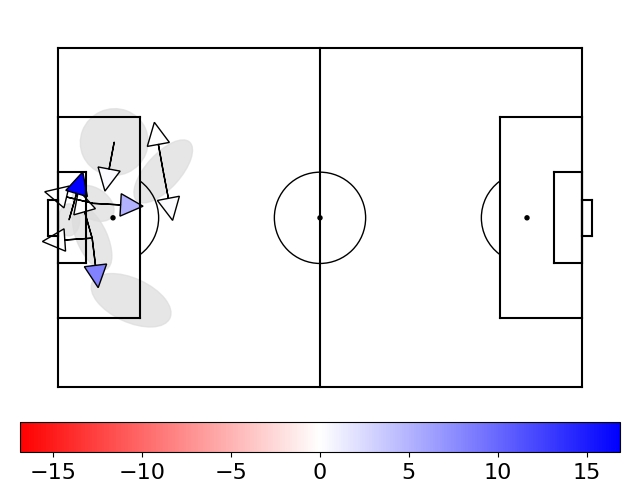

cross 2


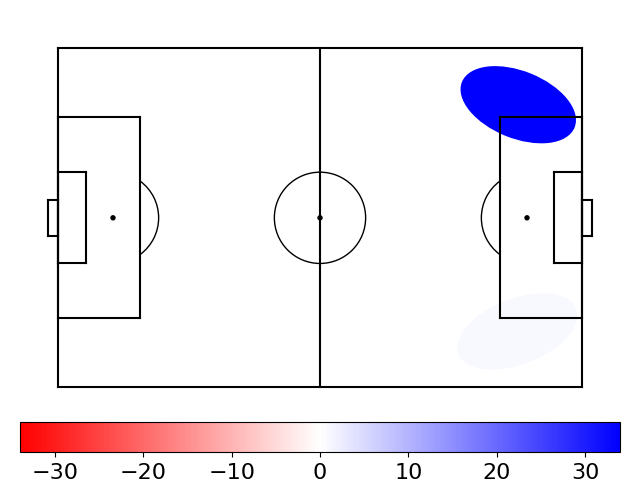

shot 1


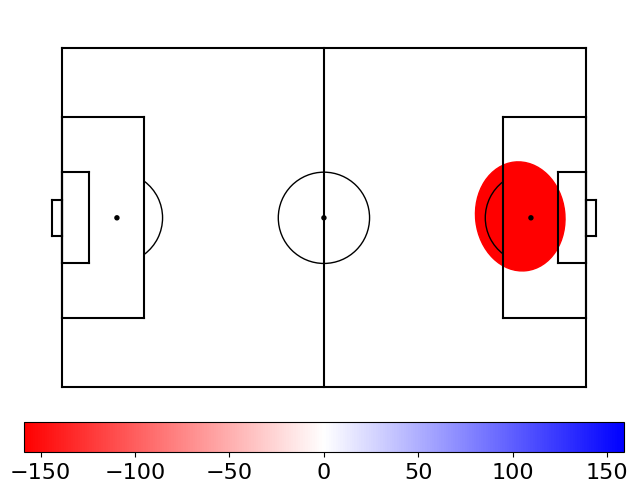

bad_touch 1


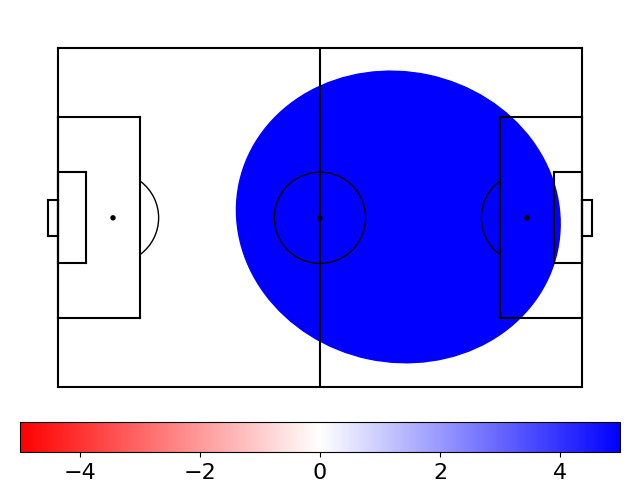

corner 2


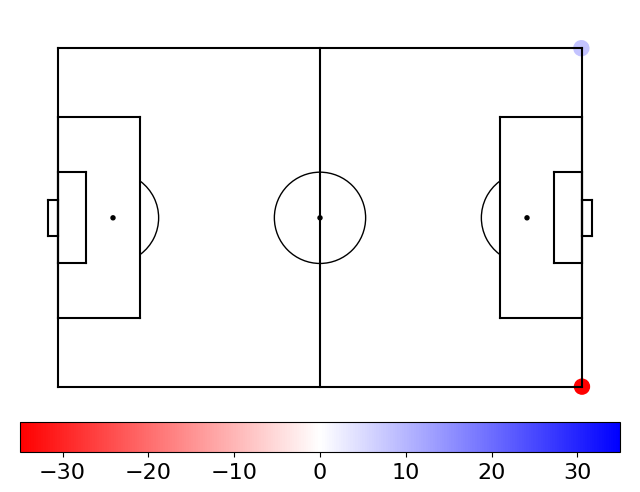

tackle 2


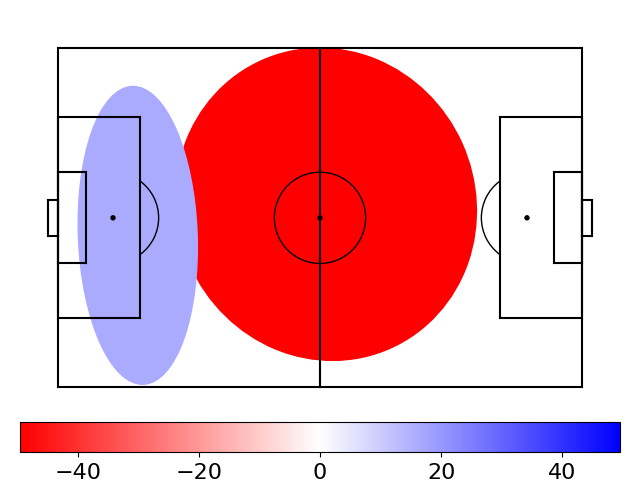

freekick 2


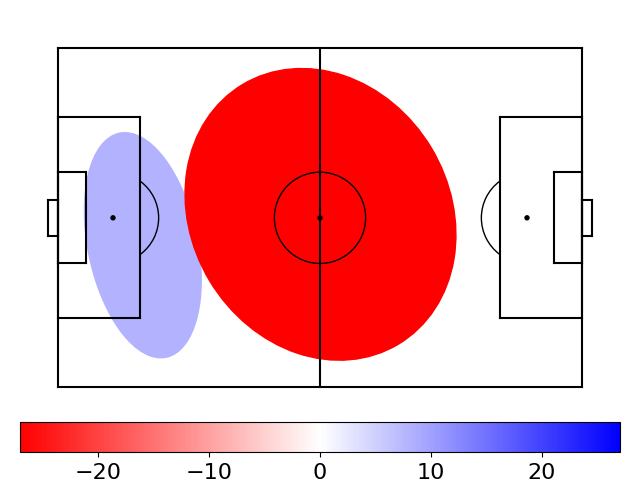

goalkick 1


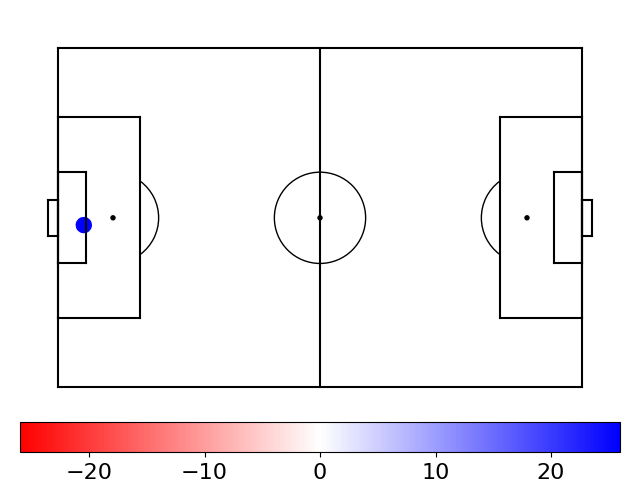

clearance 1


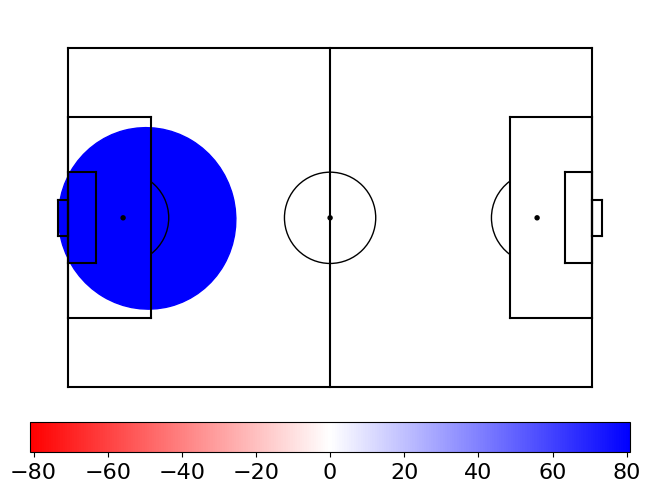

take_on 1


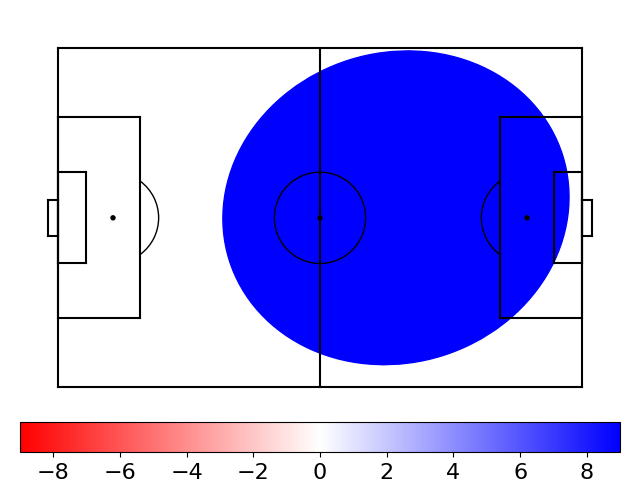

dribble 7
dribble_0 1
dribble_1 1
dribble_2 1
dribble_3 2
dribble_4 3
dribble_5 2
dribble_6 1


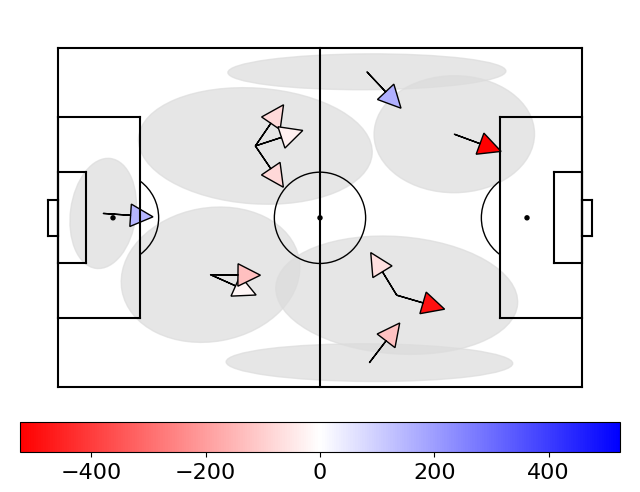

interception 2


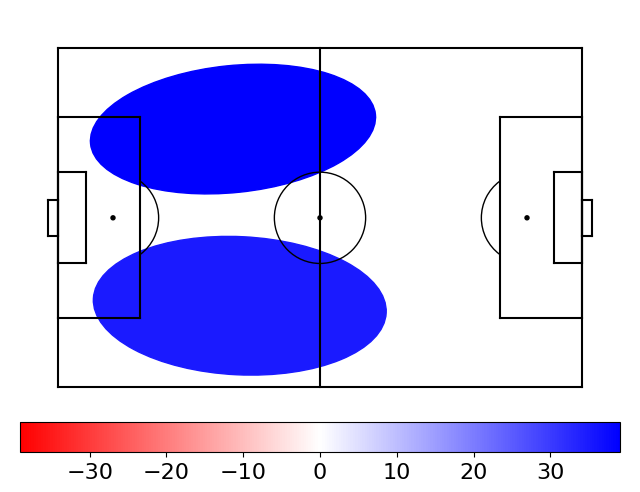

foul 1


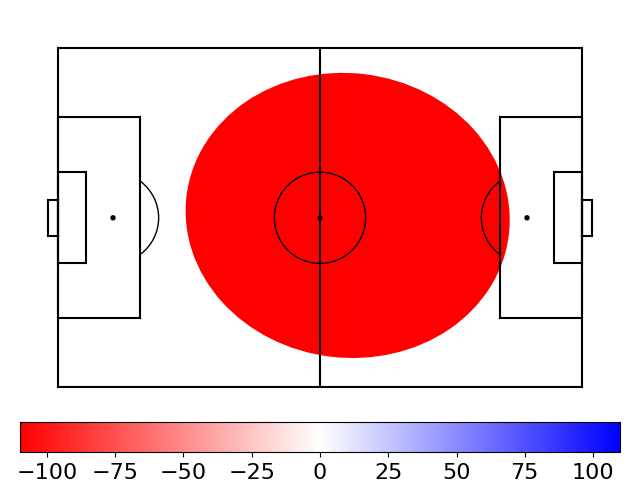

shot_penalty 1


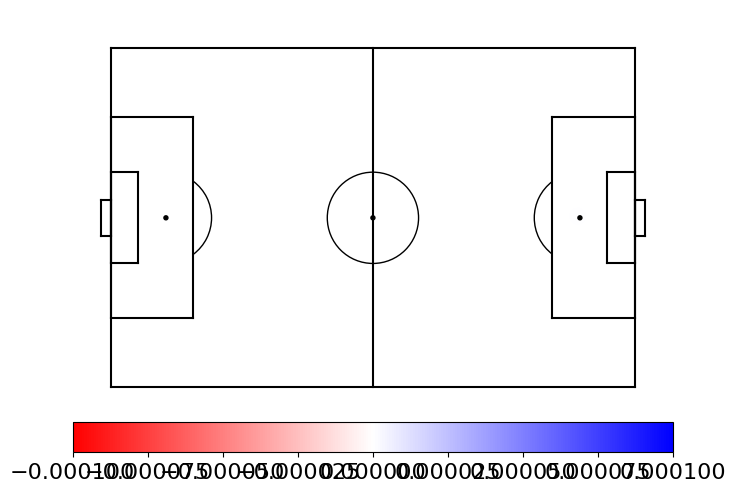

In [15]:
# difference = vec_p1 - vec_p2
# 파란색 = vec_p1에서 더 강조하는 전술 행동
vis.show_component_differences(loc_models, dir_models, vectors_pd.loc[1886], vectors_pd.loc[1889], 'Vissel Kobe', 'Sanfrecce Hiroshima', save=False)